[ExoData](https://pypi.python.org/pypi/exodata/2.1.6)
* Searching of planets (including alternate names)
* Easy reference of planet parameters ie GJ1214b.ra, GJ1214b.T, GJ1214b.R
* Calculation of values like the transit duration.
* Define planet types and query planets to find out what they are
* Easy rescale of units
* Easily navigate hierarchy (ie from planet to star or star to planets)
* Availability of system parameters in planets (ie ra, dec, d (distance))

[ExoData paper](http://arxiv.org/pdf/1510.02738v1.pdf)

In [2]:
!echo $CONDA_PREFIX

/home/Jerome/miniconda3/envs/astroconda


In [3]:
import exodata
exocat = exodata.load_db_from_url()

In [4]:
exodata.__version__

'2.1.6'

In [5]:
#exocat.systems
#exocat.stars
exocat.planets[:10]
#exocat.transitingPlanets

[Planet('11 Com b'),
 Planet('11 UMi b'),
 Planet('14 And b'),
 Planet('14 Her b'),
 Planet('14 Her c'),
 Planet('16 Cygni B b'),
 Planet('18 Del b'),
 Planet('1RXS1609 b'),
 Planet('1SWASP J1407 b'),
 Planet('24 Sex b')]

In [6]:
import exodata.astroquantities as aq

In [7]:
superEarths = [planet for planet in exocat.planets if planet.R < (10 * aq.R_e)]

In [8]:
len(superEarths)

2393

In [9]:
kepler60b = exocat.searchPlanet('kepler60b')

In [10]:
kepler60b.a

array(0.07497) * au

In [11]:
from exodata.equations import KeplersThirdLaw

#KeplersThirdLaw(a=0.01488*aq.au, M_s=0.176*aq.M_s).P
period = KeplersThirdLaw(a=kepler60b.a, M_s=kepler60b.star.M).P
period

/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/quantities/quantity.py:379: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return self.magnitude == other


array(7.129771669674404) * d

In [12]:
period.rescale(aq.yr)

array(0.019520667911498774) * yr

Get data as dict and calculate parameters

In [13]:
gj1214b = exocat.planetDict['Gliese 1214 b']

In [14]:
gj1214b.calcSurfaceGravity()

/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/quantities/quantity.py:379: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return self.magnitude == other


array(7.929735778087916) * m/s**2

In [15]:
gj1214b.calcLogg()

/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/quantities/quantity.py:379: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return self.magnitude == other


2.8992587166958943

In [16]:
gj1214b.calcTransitDuration(circular=True)

array(52.7473253396858) * min

Plotting

In [28]:
%matplotlib inline

dm_plot = exodata.plots.DiscoveryMethodByYear(exocat.planets, methods_to_plot=('RV', 'transit', 'Other'))

/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


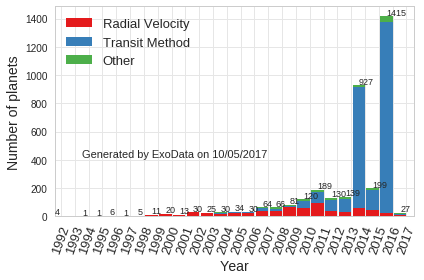

In [52]:
dm_plot.plot(method_labels=('Radial Velocity', 'Transit Method', 'Other'));

/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


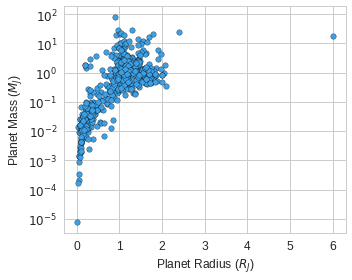

In [27]:
exodata.plots.GeneralPlotter(exocat.planets, 'R', 'M', yaxislog=True).plot()

/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


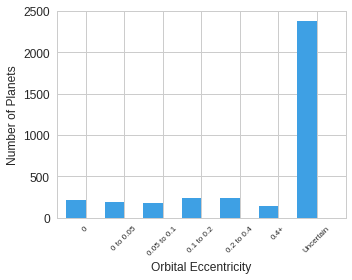

In [53]:
exodata.plots.DataPerParameterBin(exocat.planets, 'e',
(0, 0, 0.05, 0.1, 0.2, 0.4, float('inf'))).plotBarChart(label_rotation=45)

/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


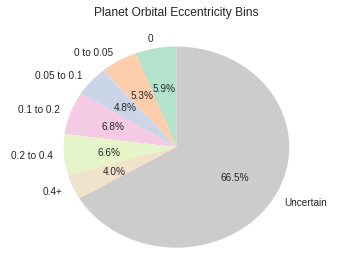

In [54]:
exodata.plots.DataPerParameterBin(exocat.planets, 'e',
(0, 0, 0.05, 0.1, 0.2, 0.4, float('inf'))).plotPieChart()

/home/Jerome/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


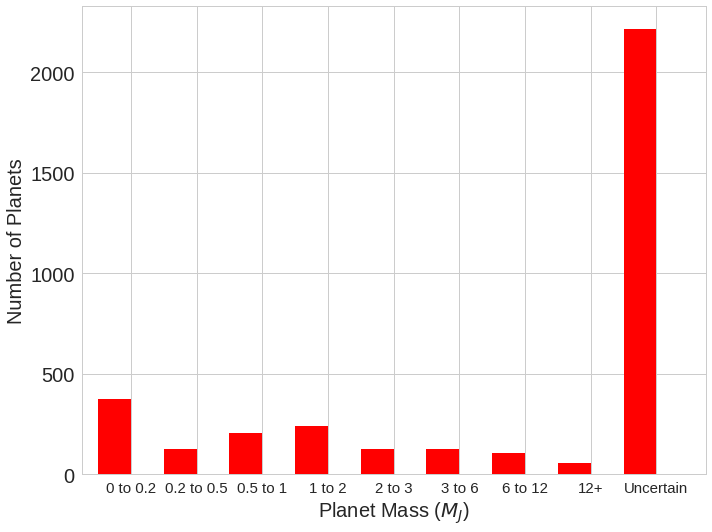

In [55]:
exodata.plots.DataPerParameterBin(exocat.planets, 'M',
(0, 0.2, 0.5, 1, 2, 3, 6, 12, float('inf')), size='large').plotBarChart(c='r')